# House Prices in Bangalore
Bangalore becoming the one of the main centre for IT industry, the living cost also is inflating day by day, in this analysis we look at the prices of the rent in the bangalore at various regions of the Bangalore city. The data is collected by webscraping the 99acres.com using Scrapy module.
Objective:
Looking at the prices of houses for rent at different regions of Bangalore.

In [1]:
#Importing Modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import mean_squared_error as MSE
%matplotlib inline

In [2]:
#Importing Data
df=pd.read_csv('House_price.csv')

# Data Exploration

In [4]:
print(df.info())
print('*'*100)
print(df.head())
print('*'*100)
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Address     174 non-null    object
 1   Prices      251 non-null    object
 2   Bedrooms    250 non-null    object
 3   SqFt        156 non-null    object
 4   Furnishing  251 non-null    object
dtypes: object(5)
memory usage: 12.5+ KB
None
****************************************************************************************************
                        Address   Prices     Bedrooms  SqFt     Furnishing
0     Ulsoor, Bangalore Central   60,000  3 Bedrooms   2000      Furnished
1                           NaN      NaN          NaN   NaN            NaN
2   Bhoganhalli, Bangalore East   58,000  4 Bedrooms    NaN  Semifurnished
3                           NaN   10,500  2 Bedrooms    700    Unfurnished
4          ITPL, Bangalore East   13,000   1 Bedroom    550  Semifurnished
*******************

The current data contains lots of unwanted data, in order to clean the we look for the missing values in the data.

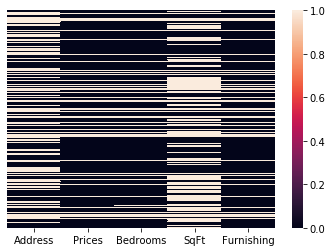

In [5]:
sns.heatmap(df.isnull(),yticklabels=False)

In [6]:
df.isnull().sum()

Address       144
Prices         67
Bedrooms       68
SqFt          162
Furnishing     67
dtype: int64

In [7]:
# Filling Missing values for Prices 
df=df.drop(df.index[[78,99,173,291]]) # removing rows
df.Prices=df.Prices.str.replace(',','') 
df.Prices=df.Prices.fillna(0)
df.Prices=df.Prices.astype(int)
df.Prices.replace(0,df.Prices.mean(),inplace=True) #filling missing values with mean

In [8]:
#Filling Missing values for SquareFootage 
df.SqFt=df.SqFt.fillna(0)
df.SqFt=df.SqFt.astype(int)
df.SqFt=df.SqFt.replace(0,df.SqFt.mean())

In [9]:
# Filling missing Values for Bedrooms 
df.Bedrooms=df.Bedrooms.str.replace('Bedrooms','')
df.Bedrooms=df.Bedrooms.str.replace('Bedroom','')
df.Bedrooms=df.Bedrooms.str.replace('Room','')
df.Bedrooms=df.Bedrooms.fillna(0)
df.Bedrooms=df.Bedrooms.replace(0,df.Bedrooms.mode()).astype(int)

In [10]:
# Creating Regions from Address from the data
new=df.Address.str.split(',',n=2,expand=True)

df['Region']=new[1]
df['Region']=df['Region'].str.replace('Bangalore','')
df.Region=df.Region.fillna(0)
df.Region=df.Region.replace(0,'Unknown')
df=df[['Bedrooms','SqFt','Furnishing','Region','Address','Prices']]

In [11]:
# Filling missing values for Furnishing
df.Furnishing=df.Furnishing.fillna(0)
df.Furnishing=df.Furnishing.replace(0,'Semifurnished')

In [13]:
print(df.info())
print('*'*100)
print(df.head())
print('*'*100)
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314 entries, 0 to 317
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Bedrooms    314 non-null    int32  
 1   SqFt        314 non-null    float64
 2   Furnishing  314 non-null    object 
 3   Region      314 non-null    object 
 4   Address     170 non-null    object 
 5   Prices      314 non-null    float64
dtypes: float64(2), int32(1), object(3)
memory usage: 25.9+ KB
None
****************************************************************************************************
   Bedrooms         SqFt     Furnishing     Region  \
0         3  2000.000000      Furnished    Central   
1         0   606.598726  Semifurnished    Unknown   
2         4   606.598726  Semifurnished       East   
3         2   700.000000    Unfurnished    Unknown   
4         1   550.000000  Semifurnished       East   

                        Address        Prices  
0     Ulsoor, Bangalore Ce

In [17]:
# Converting the Address and Furnishing dtype to categorical type
df.Region=df.Region.astype('category')
df.Furnishing=df.Furnishing.astype('category')

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Furn']=le.fit_transform(df.Furnishing)
df['Reg']=le.fit_transform(df.Region)

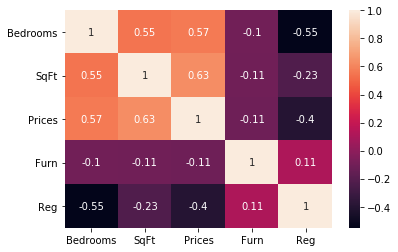

In [21]:
# Insight into Correlation between features
corr_mat=df.corr()
sns.heatmap(corr_mat,annot=True)

From above analysis it is seen that price of the house is highly correlated to the squarefootage and the number of bedrroms.

# Data Visualization

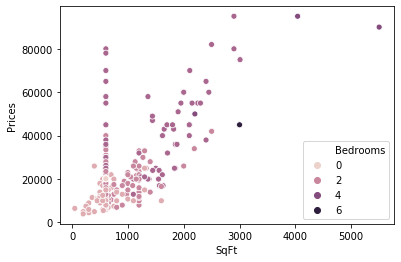

In [22]:
_=sns.scatterplot(x='SqFt',y='Prices',data=df,hue='Bedrooms')
plt.show()

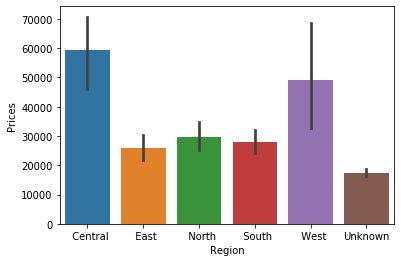

In [23]:
_=sns.barplot(x='Region',y='Prices',data=df)
plt.show()

The houses in the central and west of bangalore has higher prices compared to the other region

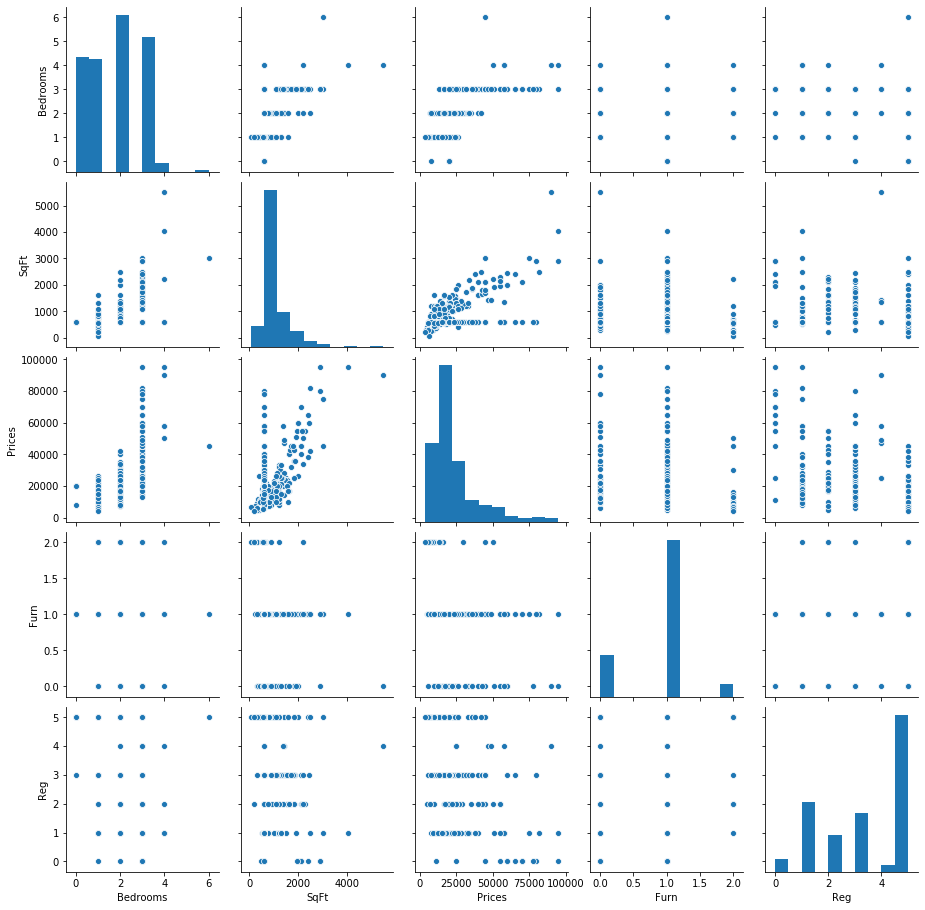

In [30]:
_=sns.pairplot(df)
plt.show()

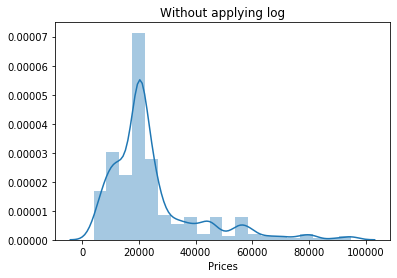

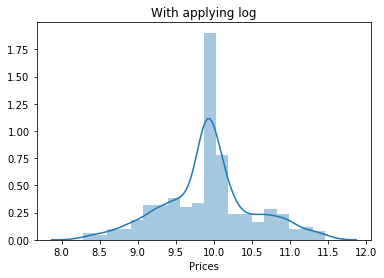

In [34]:
_=sns.distplot(df.Prices,bins=20)
plt.title('Without applying log')
plt.show()
_=sns.distplot(np.log(df.Prices),bins=20)
plt.title('With applying log')
plt.show()


By calculating the log of prices, it is seen that the prices of houses are normaly distributed

# Predictive Modelling

In [62]:
# Preparing training and test data
data=df[['Bedrooms','SqFt','Furn','Reg']]
X=np.array(data.iloc[:,:])
y=np.array(df.iloc[:,5]).reshape((-1,1))

# Scaling the data 
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
y_scaled=scaler.fit_transform(y)

# Splitting the data
X_train,X_test,y_train,y_test=train_test_split(X_scaled, y_scaled, random_state=42, test_size=0.3)

## Linear Regression

In [37]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
Error=MSE(y_pred,y_test)
err_sqrt=Error**(1/2)
print('The error for Linear Regression is:',err_sqrt)

The error for Linear Regression is: 0.7268345029128854


## Ridge

In [38]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train,y_train)
y_pred=ridge.predict(X_test)
Error=MSE(y_pred,y_test)
err_sqrt=Error**(1/2)
print('The error for Ridge is:',err_sqrt)


The error for Ridge is: 0.726621172520273


## Lasso

In [39]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(X_train,y_train)
y_pred=lasso.predict(X_test)
Error=MSE(y_pred,y_test)
err_sqrt=Error**(1/2)
print('The error for Lasso is:',err_sqrt)

The error for Lasso is: 0.9499046887462003


## SVR

In [40]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train,y_train)
y_pred=svr.predict(X_test)
Error=MSE(y_pred,y_test)
err_sqrt=Error**(1/2)
print('The error for SVR is:',err_sqrt)

The error for SVR is: 0.6545569666614661


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## DecisionTreeRegressor

In [41]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
Error=MSE(y_pred,y_test)
err_sqrt=Error**(1/2)
print('The error for Decision Tree Regression is:',err_sqrt)

The error for Decision Tree Regression is: 0.6590560366654502


## RandomForest Regressor

In [42]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
Error=MSE(y_pred,y_test)
err_sqrt=Error**(1/2)
print('The error for RandomForest Regression is:',err_sqrt)

The error for RandomForest Regression is: 0.5648103514202498


C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


## GridSearchCV

In [43]:
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[100,200,300],'max_depth':[2.3,4,5,6,7,8,9],'bootstrap':[True,False]}
grid=GridSearchCV(estimator=rf,param_grid=parameters,n_jobs=-1,cv=10)
grid.fit(X_train,y_train)
y_pred=grid.predict(X_test)
Error=MSE(y_pred,y_test)
err_sqrt=Error**(1/2)
print('The error for GridSearchCV is:',err_sqrt)

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


The error for GridSearcgCV is: 0.5870262907572902


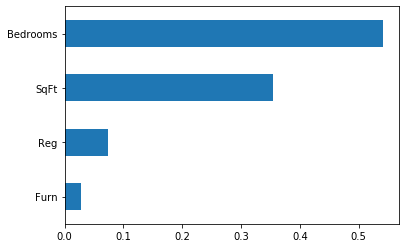

In [59]:
importances=rf.feature_importances_
feat_imp=pd.Series(importances,index=data.columns)
feat_imp.sort_values().plot(kind='barh')
plt.show()

Number of Bedrooms has the highest feature importance among all the features.

# Conclusion
Linear Regression:0.7268 <br>
Ridge: 0.7266 <br>
Lasso: 0.9499 <br>
SVR: 0.6545 <br>
DecisionTree Regressor: 0.6590 <br>
Random Forest Regressor: <b> 0.5648 </b> <br>
<br>
After predictive modelling it can be seen that the RandomForest regrerssor has the lowest MSE error